# Variable transformers : ReciprocalTransformer

The ReciprocalTransformer() applies the reciprocal transformation 1 / x
to numerical variables.

The ReciprocalTransformer() only works with numerical variables with non-zero
values. If a variable contains the value  the transformer will raise an error.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.transformation import ReciprocalTransformer

In [2]:
# load data

data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
# transform 2 variables

rt = ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])

rt.fit(X_train)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [5]:
# variables to transform

rt.variables_

['LotArea', 'GrLivArea']

In [6]:
# transforming variables
train_t = rt.transform(X_train)
test_t = rt.transform(X_test)

Text(0.5, 0, 'GrLivArea')

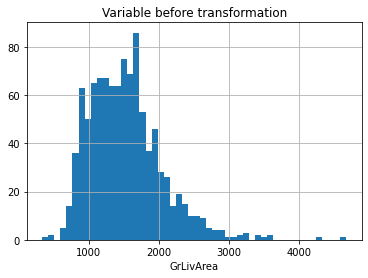

In [7]:
# variable before transformation
X_train['GrLivArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'GrLivArea')

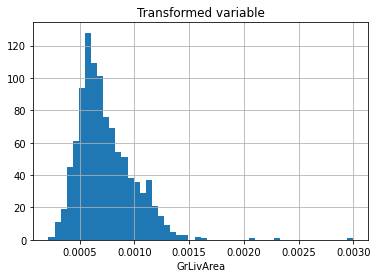

In [8]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)
plt.title('Transformed variable')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'LotArea')

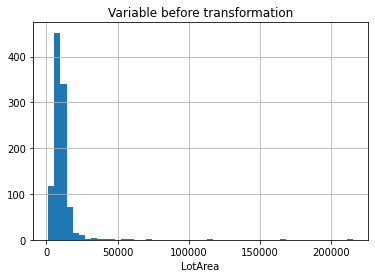

In [9]:
# tvariable before transformation
X_train['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

Text(0.5, 0, 'LotArea')

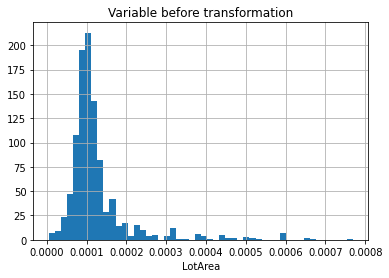

In [10]:
# transformed variable
train_t['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

In [11]:
# return variables to original representation

train_orig = rt.inverse_transform(train_t)
test_orig = rt.inverse_transform(test_t)

<AxesSubplot:>

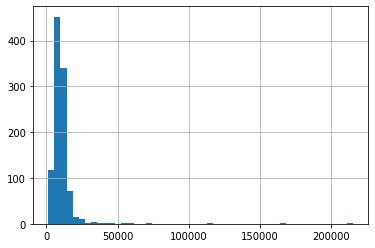

In [12]:
# inverse transformed variable distribution

train_orig['LotArea'].hist(bins=50)

<AxesSubplot:>

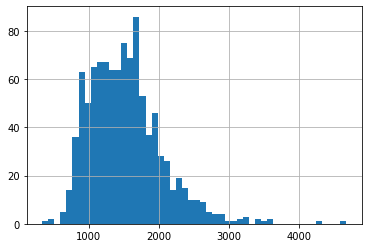

In [13]:
# inverse transformed variable distribution

train_orig['GrLivArea'].hist(bins=50)

## Automatically select numerical variables

We cannot do reciprocal transformation when the variable values are zero so we will use only positive variables for this demo.

In [14]:
# load numerical variables only

variables = ['LotFrontage', 'LotArea',
             '1stFlrSF', 'GrLivArea',
             'TotRmsAbvGrd', 'SalePrice']

data = pd.read_csv('houseprice.csv', usecols=variables)

In [15]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [16]:
# Impute missing values

arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=2)

arbitrary_imputer.fit(X_train)

# impute variables
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [17]:
# reciprocal transformation

rt = ReciprocalTransformer()

rt.fit(train_t)

ReciprocalTransformer()

In [18]:
# variables to transform
rt.variables_

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd']

<AxesSubplot:>

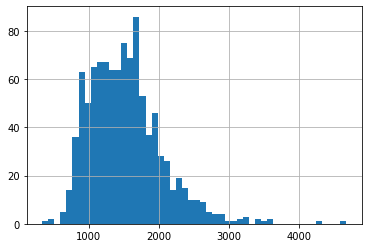

In [19]:
# before transforming 

train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

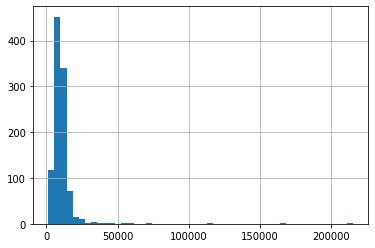

In [20]:
# before transforming 
train_t['LotArea'].hist(bins=50)

In [21]:
# transform variables
train_t = rt.transform(train_t)
test_t = rt.transform(test_t)

<AxesSubplot:>

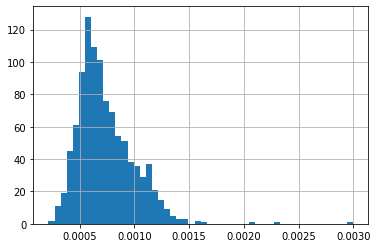

In [22]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

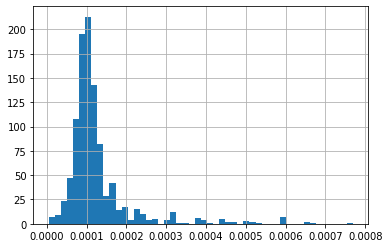

In [23]:
# transformed variable
train_t['LotArea'].hist(bins=50)

In [24]:
# return variables to original representation

train_orig = rt.inverse_transform(train_t)
test_orig = rt.inverse_transform(test_t)

<AxesSubplot:>

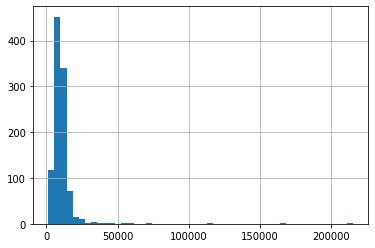

In [25]:
# inverse transformed variable distribution

train_orig['LotArea'].hist(bins=50)

<AxesSubplot:>

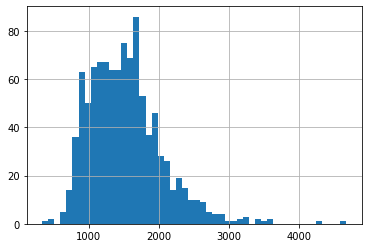

In [26]:
# inverse transformed variable distribution

train_orig['GrLivArea'].hist(bins=50)